Я не совсем понимаю, как вставить все коды со всеми моими попытками в один ноутбук, потому что они у меня в разных ноутбуках сохранены (один ноутбук - одна модель). Если они нужны, я могу долнительно прислать (моя почта  liza47683@gmail.com). Здесь я вставила свою самую успешную модель, но даже она набрала только 0.971, эти девять тысячных стали очень обидными. В этом небольшом тексте я постарась описывать основные изменения, которые вносила в модель, и то.ю как они влияли на результат.

Я не сразу поняла, как лучше строить архитектуру, какие слои добавлять и в какой последовательности, поэтому много работ добавила на Kaggle с очень низкими результатами. Потом только поняла, что модель переобучалась на train, а на тестовой выборке показывала плохие результаты.
В итоге, после многих проб и попыток, дополнительного чтения и помощи от лектора в виде ноутбука составила неплохую модель: Conv2D-Conv2D-MaxPooling-Dropout(0,25)-Conv2D-Conv2D-MaxPooling-Dropout(0,25)-Conv2D-Conv2D-MaxPooling-Dropout(0,25)-GlobalAveragePooling2D-Dense(128)-Dropout(0,5)-Dense(340, ’softmax’). У convolutional layers использовала kernel size (3, 3) и возрастающее количество фильтров (16, 16, 32, 32, 64, 64), использовала Leaky ReLU(0,1). Pooling layers взяла (2,2). В итоге было 123972 параметра, а размер картинок = 128, и при небольших batch_size, steps_per_epoch и epoch модель уже показала хороший результат на тестовой выборке в 0.574. Вообще, я, конечно, начала с еще более простой модели Conv2D(16, (3,3))-Conv2D(16, (3,3))-GlobalAveragePooling2D-Dense(64)-Dense(340), использовала активацию elu, кроме последней – там softmax.На тестовой выборке результат получился 0.208, при размере картинок = 128 и 25668 параметрах, но здесь я просто проверяла, правильно понимаю структуру слоев и вообще, как все работает, потому что до этого результаты были 0.005. При этом я так сконцентрировалась на архитектуре модели, что забыла нормализовать выборку, а это нужно было сделать, судя по комментариям лектора в выложенном им ноутбуке. Но результаты без нормализации были отличными, а с ней процесс обучения почему-то застопорился на score меньшем 0,01, поэтому решила это пока не применять.
Дальше была выложена новая версия ноутбука, в которой предлагалось поупражняться с аугментацией картинок. Я пыталась, сделала, как на скринах, но модель совсем не училась, поэтому я решила отложить аугментацию и усложнить предыдущую модель, потому что было куда расти. 
По ссылке можно посмотреть, как я вставляла аугментацию. [link text](https://drive.google.com/file/d/1QXerMzw1NpuZzOFBaAFoCtX0l3y_QAGc/view?usp=sharing) [link text](https://drive.google.com/file/d/15PE0Vo_EPwRVyhGEzpg0TXSOHd8nMyka/view?usp=sharing)
 
Расширила предыдущую модель, теперь стало вот так: Conv2D-Conv2D-MaxPooling-Dropout(0,25)-Conv2D-Conv2D-MaxPooling-Dropout(0,25)-Conv2D-Conv2D-MaxPooling-Dropout(0,25)- Conv2D-Conv2D-MaxPooling-Dropout(0,25)-GlobalAveragePooling2D-Dense(128)-Dropout(0,5)-Dense(340, ’softmax’). У convolutional layers использовала kernel size (3, 3) и возрастающее количество фильтров (16, 16, 32, 32, 64, 64, 128, 128), использовала Leaky ReLU(0,1). Pooling layers взяла (2,2). В итоге было 353604 параметра, а размер картинок = 128, и при batch_size=512, steps_per_epoch=512 и epoch=32 при обучении модель достаточно легко дошла до 0.7, а дольше застопорилась, на тестовой выборке score = 0,693 (от чего мне стало даже обидно).
Решила все же добавить нормализацию изображений в комбинации с предыдущей архитектурой. В этот раз обучение идет гораздо лучше (по сравнению с прошлым добавлением нормализации), видимо, до этого я косячила. Обучение идет более равномерно. Но результат на тестовой выборке оказался хуже! 0,685 (снова обидно, что не дотянула до 0,7)

Все же убрала нормализацию изображений. Усложнила модель с помощью Flatten и заменила последний GlobalAveragePooling2D на MaxPooling. Размеры батча, шагов и эпох пока оставила как раньше. Параметров теперь 1385796. За три эпохи на обучении моделька дошла до 0,5. Переобучится? Нет, не переобучилась! На тесте получилось 0.724. Flatten хорошо помог.
Запустила предыдущую модель с batch_size = 512, steps_per_epoch = 800 и epoch = 40. За 10 часов (я успела на учебу и тренировку съездить) модель набрала 0.791. ОБИДНО. А модель потом отключилась.

Ради эксперимента заменила Dense(128) на Dense(256). Модель тут же переобучилась. Возвращаюсь к прежней с большим количеством steps_per_epoch и epoch. Соответственно, 1000 и 90. Оставила ноутбук на ночь, он доучился до 40 эпохи и дольше силы кончились, когда проснулась восстановить уже не получилось. Top_3_accuracy была больше 0.8 несколько эпох. [link text](https://drive.google.com/file/d/112AZZwXScoDR5Ibhg2mp416IZdRzbrpc/view?usp=sharing)
 
Дальше несколько дней я все же пыталась обучить на большом количестве steps_per_epoch и epoch свою модель. Но мне не хватило мозгов освоить чекпоинты на гугл драйве, поэтому не хватало времени дообучать модель до достойного результата.
Добавила вот такую конструкцию:
from keras.callbacks import ReduceLROnPlateau
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=10e-5, verbose=1)]
Она была призвана уменьшать лернинг рейт, когда лосс на каждом шаге уменьшается слишком слабо, и это должно помочь медленнее и точнее спускаться к локальному минимуму. [link text](https://drive.google.com/file/d/1zLcH9MRHPn0PmbTeuX1i4wiO_MLD6vbF/view?usp=sharing) вот так это выглядит.


Модель с LeakyReLU(0.2) у меня тут же переобучилась, хотя я их даже не везде увеличила => такая архитектура точно не подойдет.
Пробовала менять LeakyReLU на обычный relu, обучается медленнее и тоже не имеет смысла.


# Imports

In [0]:
import zipfile
import numpy as np
import pandas as pd
import os
import tqdm
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt
import csv
from google.colab import drive

# Download data from Kaggle

In [0]:
# we need to use python 3 version of Kaggle!
# remove python 2 version with `pip uninstall kaggle`
! pip3 install kaggle --upgrade

    100% |████████████████████████████████| 61kB 2.8MB/s 
    100% |████████████████████████████████| 235kB 5.8MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/8b/21/3b/a0076243c6ae12a6215b2da515fe06b539aee7217b406e510e
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [0]:
# get <token> from https://www.kaggle.com/<user>/account, click "Create New API Token", open json file
! KAGGLE_USERNAME=lisavinograd8 KAGGLE_KEY=6fc23d78664dfcf69cc453535fae187b kaggle competitions download -c quickdraw-doodle-recognition -f train_simplified.zip

100% 7.36G/7.37G [00:55<00:00, 173MB/s]
100% 7.37G/7.37G [00:55<00:00, 143MB/s]


In [0]:
# open zip file, will read everything from it
zf = zipfile.ZipFile("train_simplified.zip")

# Data generators from disk (no need to store in RAM)

In [0]:
class_labels = map(lambda x: x.replace(".csv", ""), zf.namelist())
class_labels[:5]

['fence', 'yoga', 'horse', 'sandwich', 'cat']

In [0]:
# loop through file eternally
def get_eternal_csv_generator(fn, debug=False):
    while True:
        with zf.open(fn) as f:
            f.readline()  # skip header
            for line in csv.reader(f, delimiter=',', quotechar='"'):
                yield line[1], line[5]
            if debug:
                print fn, "is done, starting from the beginning..."

In [0]:
def raw_batch_generator(batch_size, debug=False):
    generators = np.array([get_eternal_csv_generator(fn, debug) for fn in zf.namelist()])
    while True:
        random_indices = np.random.randint(0, len(generators), size=batch_size)
        yield [gen.next() for gen in generators[random_indices]]

# Images generator

In [0]:
# copy-paste from https://www.kaggle.com/jpmiller/image-based-cnn

import ast
from PIL import Image, ImageDraw
import cv2

IMG_SIZE = 128

# faster conversion function
def draw_it(strokes):
    img = 255 * np.ones((256, 256), np.uint8)
    for stroke in ast.literal_eval(strokes):
        for i in range(len(stroke[0]) - 1):
            _ = cv2.line(img, (stroke[0][i], stroke[1][i]), (stroke[0][i + 1], stroke[1][i + 1]), 0, 3)
    return cv2.resize(img, (IMG_SIZE, IMG_SIZE))

In [0]:

def images_and_labels_generator(batch_size):
    for batch in raw_batch_generator(batch_size):
        batch_images = []
        batch_labels = []
        for e in batch:
            batch_images.append(draw_it(e[0]))
            batch_labels.append(e[1])
        batch_images = np.stack(batch_images, axis=0)
        yield batch_images, batch_labels

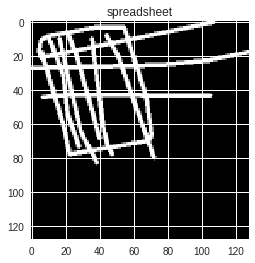

In [0]:
b = images_and_labels_generator(32).next()
plt.imshow(b[0][10, :, :])
plt.title(b[1][10])
plt.show()


# Augmentation example

Using TensorFlow backend.


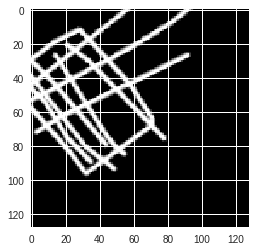

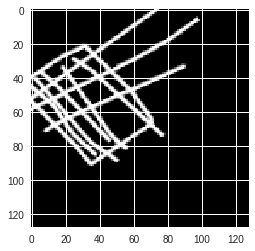

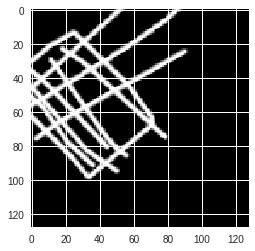

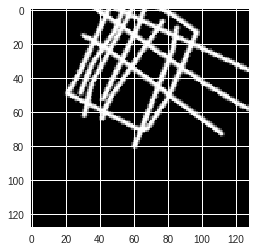

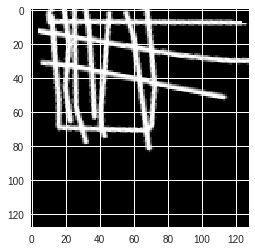

In [0]:
from keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='constant',
    cval=255
)

image = b[0][10, :, :]

# add 3 channels to image
image = np.tile(np.expand_dims(image, axis=2), (1, 1, 3))

# 5 random augmentations
for _ in range(5):
    plt.imshow(image_gen.random_transform(image)[:, :, 0])
    plt.show()


# Train simple network

In [0]:

import tensorflow as tf
import keras
from keras import backend as K

In [0]:
# reset graph when you change architecture!
def reset_tf_session():
    curr_session = tf.get_default_session()
    # close current session
    if curr_session is not None:
        curr_session.close()
    # reset graph
    K.clear_session()
    # create new session
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    s = tf.InteractiveSession(config=config)
    K.set_session(s)
    return s

In [0]:
NUM_CLASSES = len(class_labels)
class_to_idx = {c: idx for idx, c in enumerate(class_labels)}
class_to_idx.items()[:5]

[('snowman', 134),
 ('eyeglasses', 254),
 ('ceiling fan', 18),
 ('camel', 90),
 ('stove', 119)]

In [0]:
def train_iterator(batch_size):
    for batch in images_and_labels_generator(batch_size):
        images = batch[0].astype('float32')
        #images = images/255 - 0.5
        images = np.expand_dims(images, -1)
        labels = keras.utils.to_categorical(map(class_to_idx.get, batch[1]), NUM_CLASSES)
        yield images, labels

In [0]:
sample = train_iterator(128).next()
print sample[0].shape
print sample[1].shape

(128, 128, 128, 1)
(128, 340)


In [0]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, GlobalAveragePooling2D, \
    BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [0]:

def make_model():
    """
    Define your model architecture here.
    Returns `Sequential` model.
    """
    model = Sequential()

    ### YOUR CODE HERE: replace with a better model! Batch normalization really helps!
    
    keras.layers.normalization.BatchNormalization(epsilon=1e-06, mode=0, momentum=0.9, weights=None)
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(16, kernel_size=(3,3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(2,2))
    
    model.add(Dropout(0.25))
    
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(32, kernel_size=(3,3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(2,2))
    
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(64, kernel_size=(3,3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(2,2))
    
    model.add(Dropout(0.25))
      
    model.add(Conv2D(128, (3, 3), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(128, kernel_size=(3,3), padding='same'))
    model.add(LeakyReLU(0.1))
    
    model.add(MaxPooling2D(2,2))
   
    model.add(Flatten())  
  
    model.add(Dense(128))
    model.add(Dropout(0.5))
    
    model.add(Dense(NUM_CLASSES, activation="softmax"))
    
    return model

In [0]:
# describe model
s = reset_tf_session()  # clear default graph
model = make_model()
model.summary()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(epsilon=1e-06, weights=None, momentum=0.9)`
  # This is added back by InteractiveShellApp.init_path()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 16)      160       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 16)      2320      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 128, 128, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 32)        4640      
__________

In [0]:
# custom metrics we need
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

In [0]:
BATCH_SIZE = 512
STEPS_PER_EPOCH = 800
EPOCHS = 40

s = reset_tf_session()  # clear default graph
model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.adam(clipnorm=5.),  # gradient clipping just in case
    metrics=[categorical_accuracy, top_3_accuracy]  # report top 3 accuracy, correlates with MAP@3!
)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(epsilon=1e-06, weights=None, momentum=0.9)`
  # This is added back by InteractiveShellApp.init_path()


In [0]:
# for saving the model after every epoch
from keras.models import save_model

class ModelSaveCallback(keras.callbacks.Callback):
    def __init__(self, file_name):
        super(ModelSaveCallback, self).__init__()
        self.file_name = file_name

    def on_epoch_end(self, epoch, logs=None):
        model_filename = self.file_name.format(epoch)
        save_model(self.model, model_filename)
        print("Model saved in {}".format(model_filename))

In [0]:
last_finished_epoch = 0

# you can continue from snapshot!!!
# from keras.models import load_model
# s = reset_tf_session()
# last_finished_epoch = 2
# model = load_model("model_{}".format(last_finished_epoch), 
#                    custom_objects={"top_3_accuracy": top_3_accuracy})

In [0]:
# fit the model with our eternal generator!
model.fit_generator(
    train_iterator(BATCH_SIZE), 
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=EPOCHS,
    callbacks=[ModelSaveCallback("model_{}")],
    verbose=1,
    initial_epoch=last_finished_epoch
)

Epoch 1/25


# Score test set

In [0]:
# download test set
! KAGGLE_USERNAME=lisavinograd8 KAGGLE_KEY=6fc23d78664dfcf69cc453535fae187b kaggle competitions download -c quickdraw-doodle-recognition -f test_simplified.csv

 76% 45.0M/59.0M [00:00<00:00, 27.0MB/s]
100% 59.0M/59.0M [00:01<00:00, 57.7MB/s]


In [0]:
def test_csv_iterator(batch_size):
    with open("test_simplified.csv", "r") as f:
        batch_keys = []
        batch_images = []
        f.readline()  # skip header
        for line in csv.reader(f, delimiter=',', quotechar='"'):
            batch_keys.append(line[0])
            batch_images.append(draw_it(line[2]))
            if len(batch_images) == batch_size:
                batch_images = np.stack(batch_images, axis=0)
                batch_images = np.expand_dims(batch_images, -1)
                batch_images = batch_images.astype('float32')
                ### YOUR CODE HERE: normalize batch_images the same way as during training!
                yield batch_keys, batch_images
                batch_keys = []
                batch_images = []
        if batch_images:  # last batch
            batch_images = np.stack(batch_images, axis=0)
            batch_images = np.expand_dims(batch_images, -1)
            batch_images = batch_images.astype('float32')
            ### YOUR CODE HERE: normalize batch_images the same way as during training!
            yield batch_keys, batch_images

In [0]:
! wc -l test_simplified.csv

112200 test_simplified.csv


In [0]:
with open("submission.csv", "w", buffering=1*1024*1024) as f:
    f.write("key_id,word\n")
    for batch_keys, batch_images in tqdm.tqdm(test_csv_iterator(BATCH_SIZE), total=np.ceil(112200./BATCH_SIZE)):
        probas = model.predict_proba(batch_images, BATCH_SIZE)
        top_3_classes = np.argsort(probas, axis=1)[:, [-1, -2, -3]]
        labels = map(lambda x: " ".join("_".join(class_labels[idx].split()) for idx in x), top_3_classes)
        for key, labels in zip(batch_keys, labels):
            f.write(key + "," + labels + "\n")

100%|██████████| 439/439.0 [02:10<00:00,  2.92it/s]


In [0]:
! wc -l submission.csv

112200 submission.csv


In [0]:
# submit to kaggle
! KAGGLE_USERNAME=lisavinograd8 KAGGLE_KEY=6fc23d78664dfcf69cc453535fae187b kaggle competitions submit quickdraw-doodle-recognition -f submission.csv -m "My precious"

100% 4.41M/4.41M [00:06<00:00, 684kB/s]
Successfully submitted to Quick, Draw! Doodle Recognition Challenge